# Лабораторная работа по модулю “Препроцессинг данных”

<pre>
ФИО: Никифоров Владимир
</pre>

1. Загрузить исходные данные data.csv 
2. Провести первоначальный анализ предложенных данных 
3. Предложить стратегию по работе с пропущенными значениями в данных 
4. Предложить стратегию по работе с категориальными переменными 
5. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей) 
6. Разбить данные на train/test
7. Решить задачу бинарной классификации и предсказать переменную ‘SalesCategory’ протестировав нескольких алгоритмов (Logistic Regression, Random Forest) 
8. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall 

9. *Попробовать отобрать наиболее важные переменные (наибольшая корреляция или метод на ваш выбор)
10. *Сравнить результаты классификации при использовании изначального датасета и датасета с уменьшенной размерностью

11. Загрузить ipython notebook с результатами работы на github репозиторий

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import dateutil.relativedelta

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
C_RANDOM_STATE = 7

In [3]:
raw_df = pd.read_csv('../data/lab_data.csv',delimiter=';')
raw_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities      ...      PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub      ...             0    NaN   NaN         NaN   
1         Lvl    AllPub      ...             0    NaN   NaN         NaN   
2         Lvl    AllPub      ...             0    NaN   NaN         NaN   
3         Lvl    AllPub      ...             0    NaN   NaN         NaN   
4         Lvl    AllPub      ...             0    NaN   NaN         NaN   

  MiscVal MoSold YrSold  SaleType  SaleCondition  SaleCategory  
0       0      2   2008        WD         Normal             1  
1       0      5   2007        WD         Normal             0  
2       0      9   2008        WD         Normal             1  
3       0      2   2006        WD        Abnorml             0  
4       0     12   2008        WD         Normal             1  

[5 rows x 81 columns]

In [4]:
print(f'Датасет следующего размера: {raw_df.shape}')

Датасет следующего размера: (1460, 81)


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Основная статистика
raw_df.describe().T

count          mean          std     min      25%     50%  \
Id             1460.0    730.500000   421.610009     1.0   365.75   730.5   
MSSubClass     1460.0     56.897260    42.300571    20.0    20.00    50.0   
LotFrontage    1201.0     70.049958    24.284752    21.0    59.00    69.0   
LotArea        1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
OverallQual    1460.0      6.099315     1.382997     1.0     5.00     6.0   
OverallCond    1460.0      5.575342     1.112799     1.0     5.00     5.0   
YearBuilt      1460.0   1971.267808    30.202904  1872.0  1954.00  1973.0   
YearRemodAdd   1460.0   1984.865753    20.645407  1950.0  1967.00  1994.0   
MasVnrArea     1452.0    103.685262   181.066207     0.0     0.00     0.0   
BsmtFinSF1     1460.0    443.639726   456.098091     0.0     0.00   383.5   
BsmtFinSF2     1460.0     46.549315   161.319273     0.0     0.00     0.0   
BsmtUnfSF      1460.0    567.240411   441.866955     0.0   223.00   477.5   
TotalBsmtSF    1460.0   1057.429452   438.705324     0.0   795.75   991.5   
1stFlrSF       1460.0   1162.626712   386.587738   334.0   882.00  1087.0   
2ndFlrSF       1460.0    346.992466   436.528436     0.0     0.00     0.0   
LowQualFinSF   1460.0      5.844521    48.623081     0.0     0.00     0.0   
GrLivArea      1460.0   1515.463699   525.480383   334.0  1129.50  1464.0   
BsmtFullBath   1460.0      0.425342     0.518911     0.0     0.00     0.0   
BsmtHalfBath   1460.0      0.057534     0.238753     0.0     0.00     0.0   
FullBath       1460.0      1.565068     0.550916     0.0     1.00     2.0   
HalfBath       1460.0      0.382877     0.502885     0.0     0.00     0.0   
BedroomAbvGr   1460.0      2.866438     0.815778     0.0     2.00     3.0   
KitchenAbvGr   1460.0      1.046575     0.220338     0.0     1.00     1.0   
TotRmsAbvGrd   1460.0      6.517808     1.625393     2.0     5.00     6.0   
Fireplaces     1460.0      0.613014     0.644666     0.0     0.00     1.0   
GarageYrBlt    1379.0   1978.506164    24.689725  1900.0  1961.00  1980.0   
GarageCars     1460.0      1.767123     0.747315     0.0     1.00     2.0   
GarageArea     1460.0    472.980137   213.804841     0.0   334.50   480.0   
WoodDeckSF     1460.0     94.244521   125.338794     0.0     0.00     0.0   
OpenPorchSF    1460.0     46.660274    66.256028     0.0     0.00    25.0   
EnclosedPorch  1460.0     21.954110    61.119149     0.0     0.00     0.0   
3SsnPorch      1460.0      3.409589    29.317331     0.0     0.00     0.0   
ScreenPorch    1460.0     15.060959    55.757415     0.0     0.00     0.0   
PoolArea       1460.0      2.758904    40.177307     0.0     0.00     0.0   
MiscVal        1460.0     43.489041   496.123024     0.0     0.00     0.0   
MoSold         1460.0      6.321918     2.703626     1.0     5.00     6.0   
YrSold         1460.0   2007.815753     1.328095  2006.0  2007.00  2008.0   
SaleCategory   1460.0      0.297945     0.457512     0.0     0.00     0.0   

                    75%       max  
Id              1095.25    1460.0  
MSSubClass        70.00     190.0  
LotFrontage       80.00     313.0  
LotArea        11601.50  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2000.00    2010.0  
YearRemodAdd    2004.00    2010.0  
MasVnrArea       166.00    1600.0  
BsmtFinSF1       712.25    5644.0  
BsmtFinSF2         0.00    1474.0  
BsmtUnfSF        808.00    2336.0  
TotalBsmtSF     1298.25    6110.0  
1stFlrSF        1391.25    4692.0  
2ndFlrSF         728.00    2065.0  
LowQualFinSF       0.00     572.0  
GrLivArea       1776.75    5642.0  
BsmtFullBath       1.00       3.0  
BsmtHalfBath       0.00       2.0  
FullBath           2.00       3.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       8.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      14.0  
Fireplaces         1.00       3.0  
GarageYrBlt     2002.00    2010.0  
GarageCars         2.00       4.0  
Gara

In [7]:
# смысла в столбце Id нет - обучаться на нем нельзя - сразу удалим
raw_df.drop(['Id'], axis=1, inplace=True)

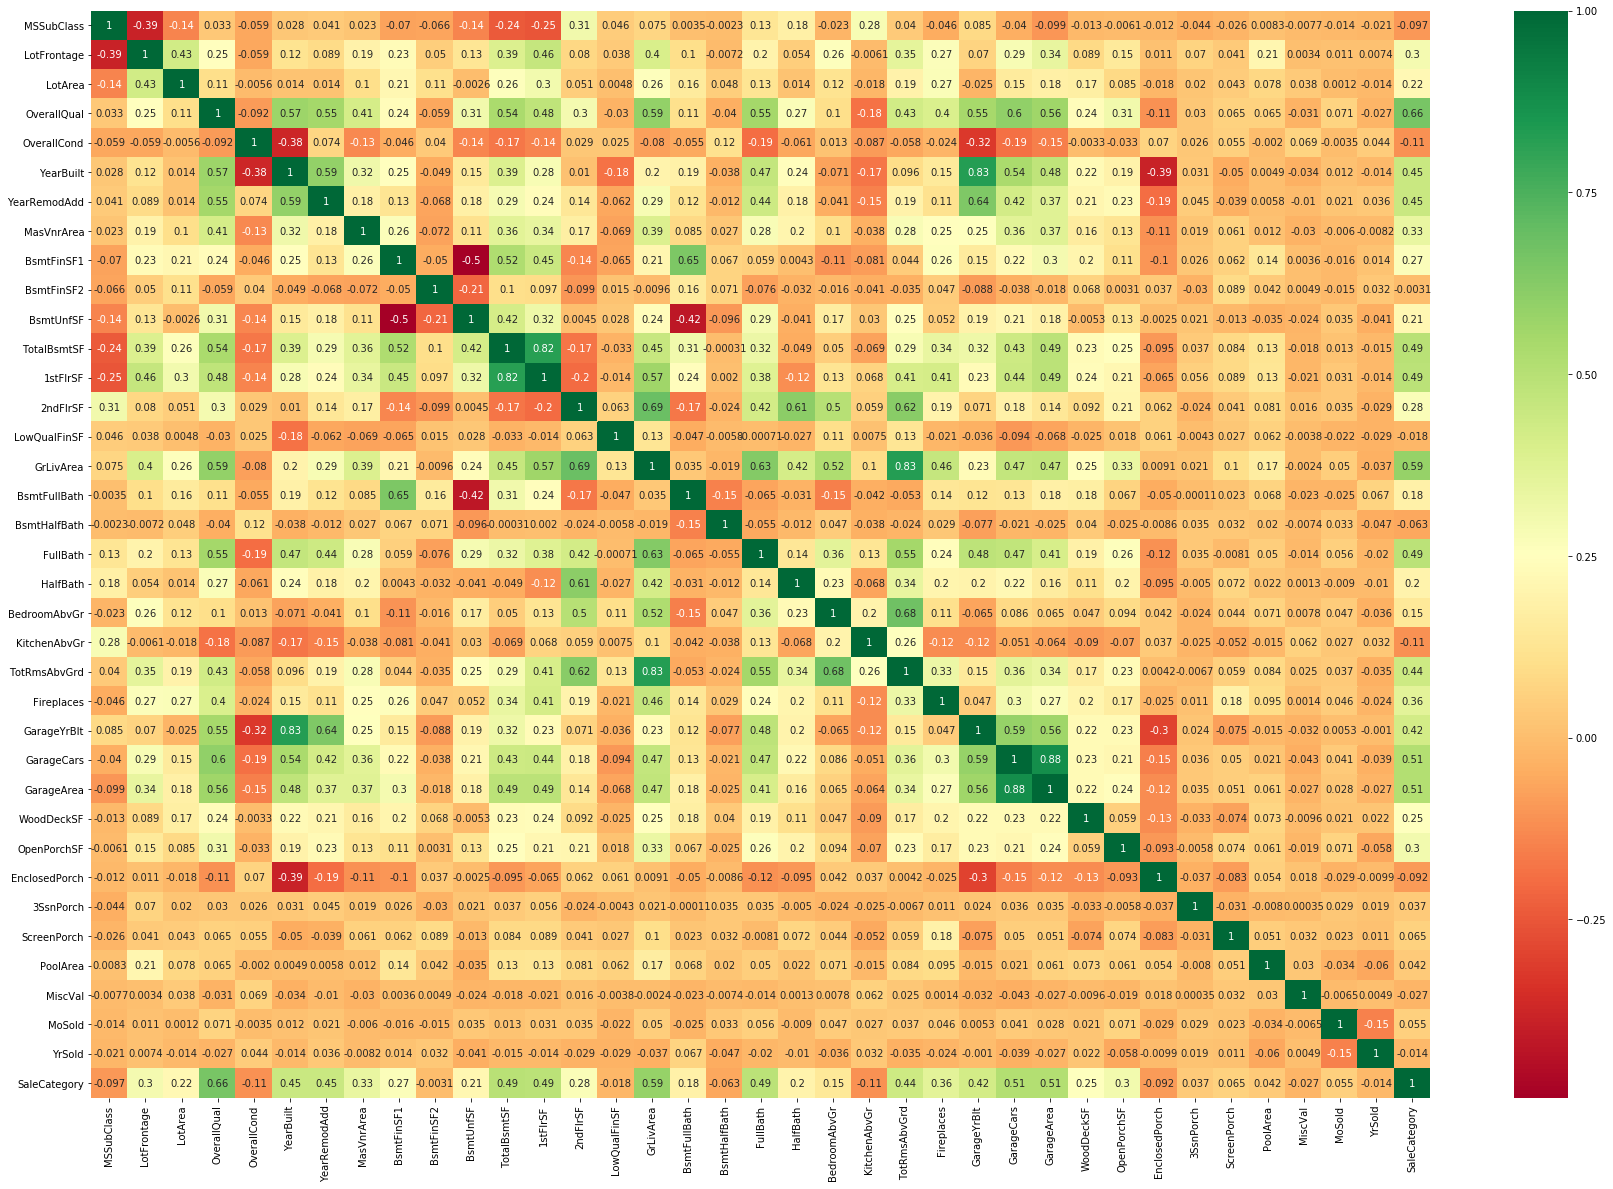

In [8]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(raw_df.corr(),annot=True,cmap="RdYlGn");

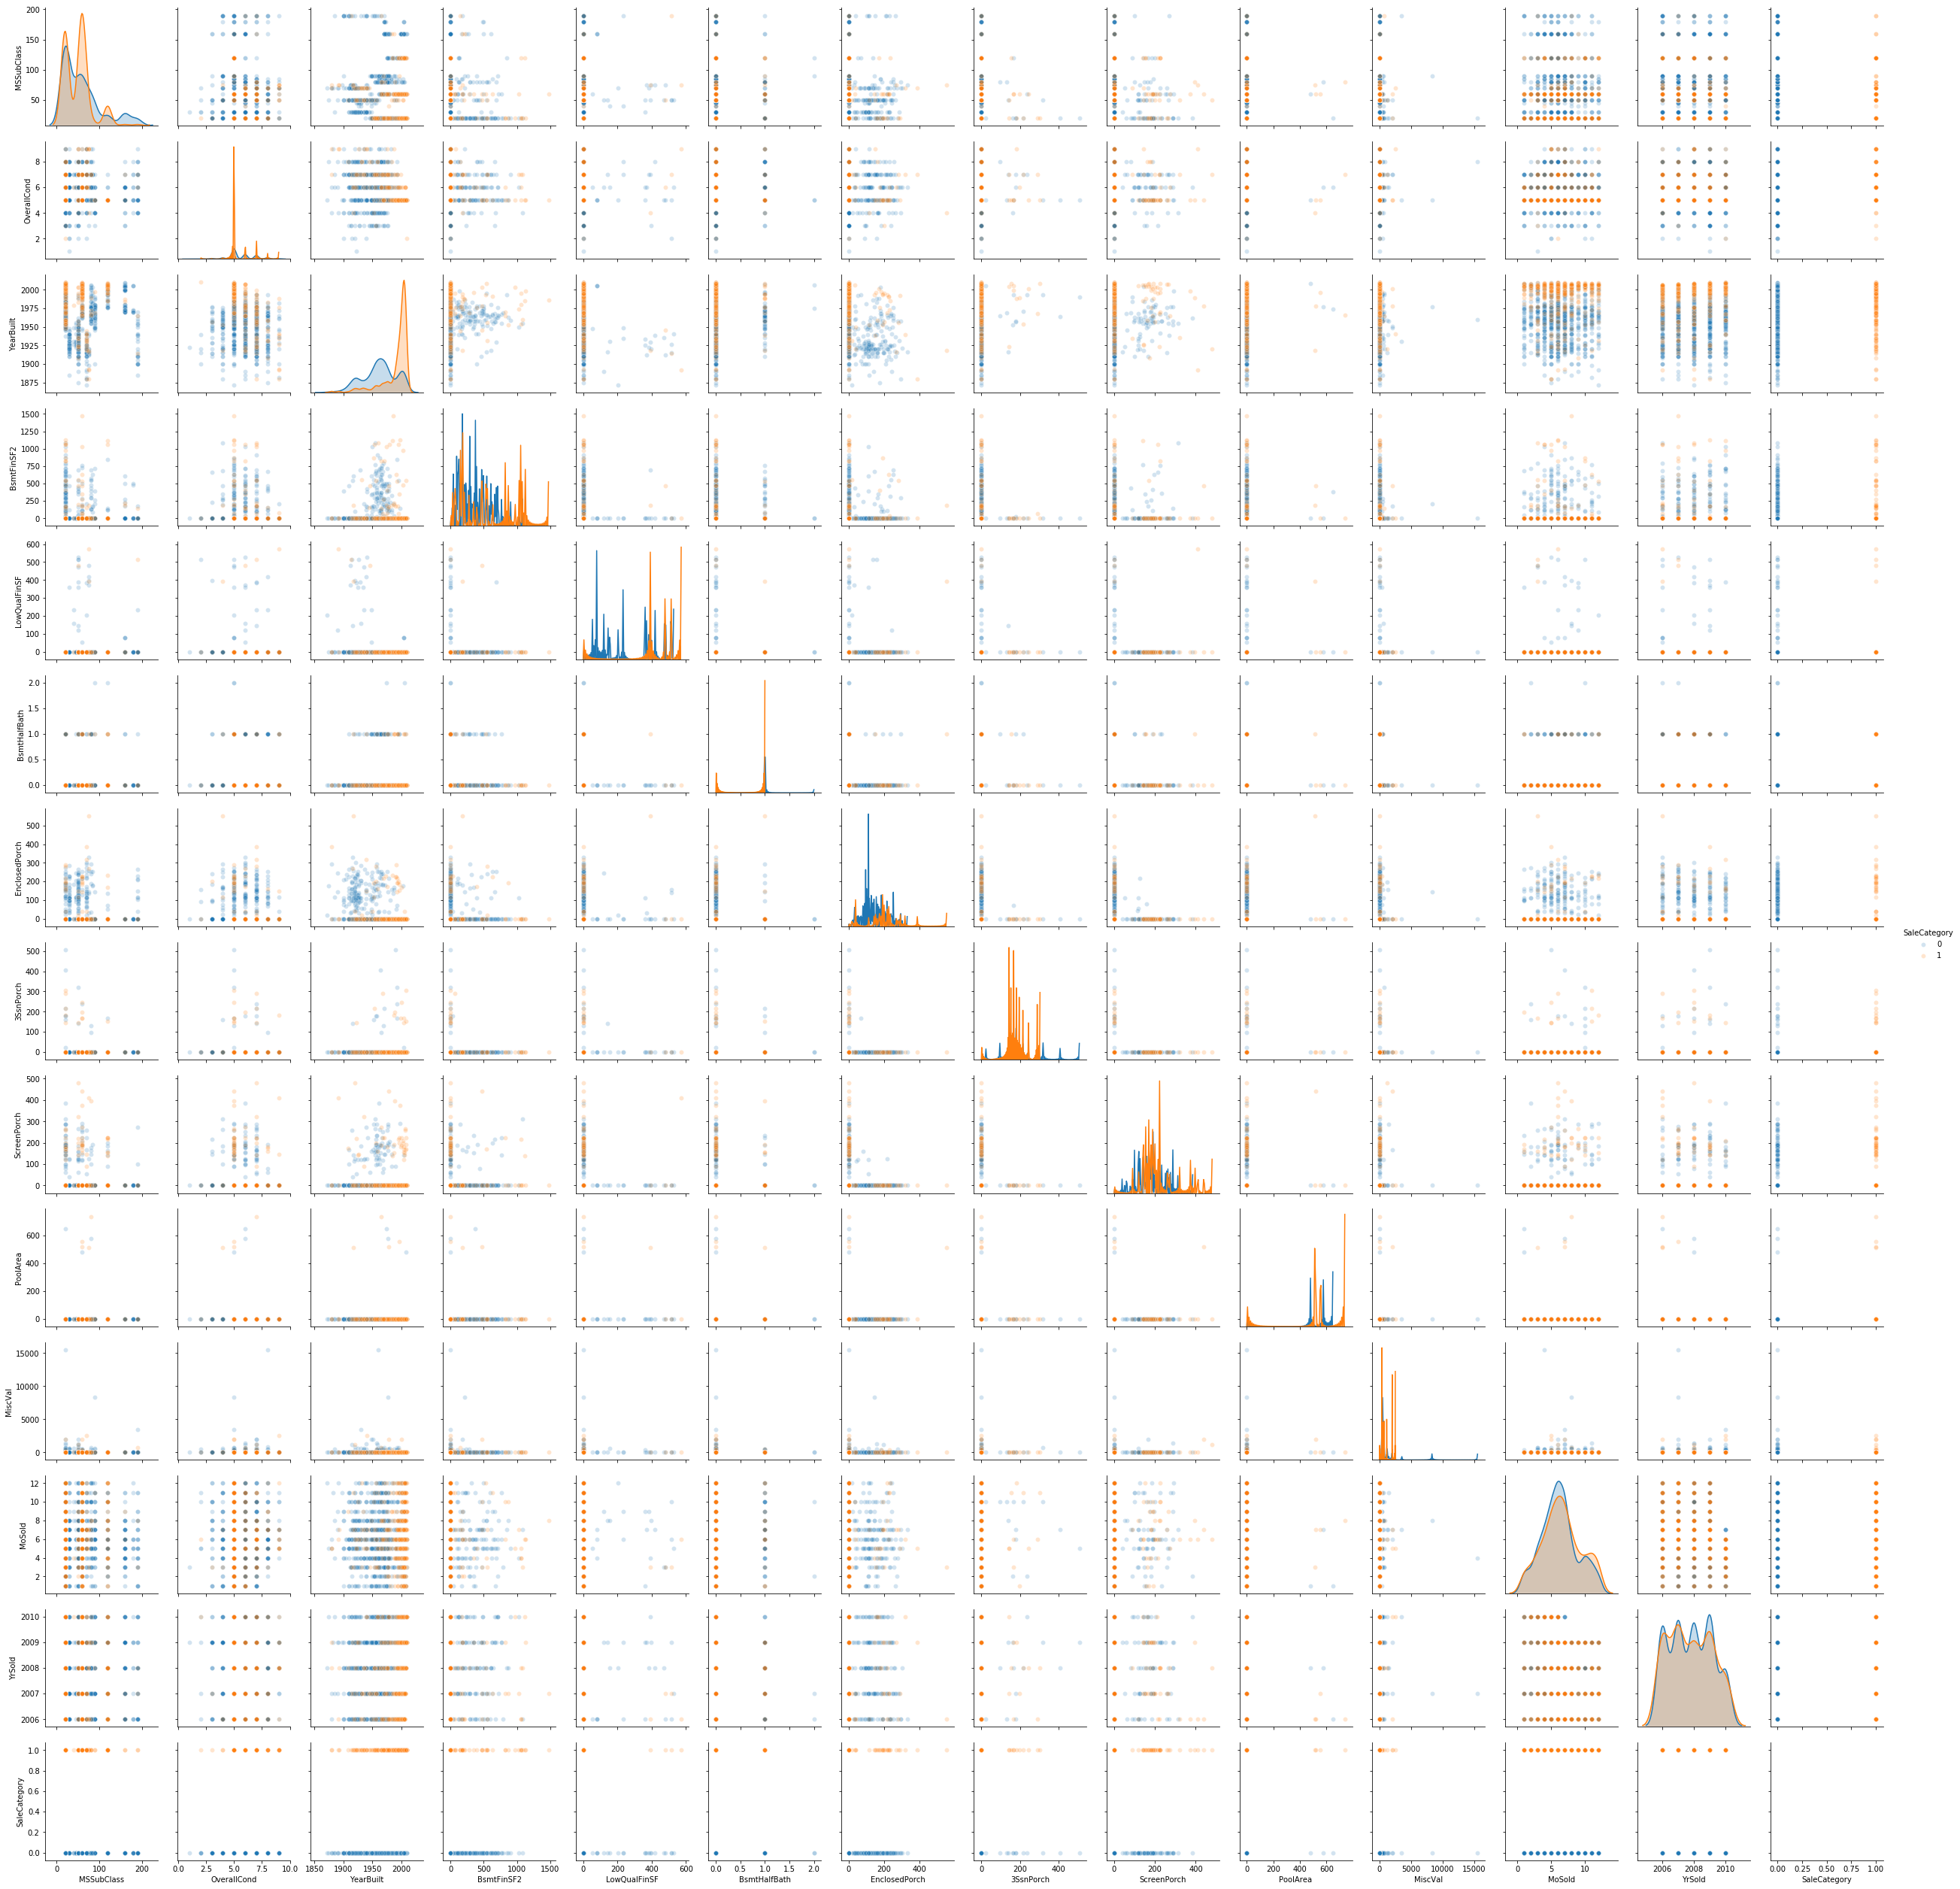

In [9]:
# Из матрицы корреляции можно сделать выводы о взаимокоррелированных переменных:
# OverallCond - можно убрать, оставив YearBuilt/YearRemodAdd
# YearBuilt - убираем, т.к. идентичен и даже хуже, чем YearRemodAdd
# MSSubClass,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold - влияние на SaleCategory слабое
cols_to_drop=['MSSubClass','OverallCond','YearBuilt','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
# Перед тем, как удалять данные столбцы - посмотрим на их взаимосвясь с предсказываемым признаком
sns.pairplot(data=raw_df[cols_to_drop+['SaleCategory']],plot_kws={'alpha':0.2},hue='SaleCategory');

Выводы сделаны правильно, можно удалять лишние признаки:

In [10]:
raw_df.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
# Сильная корреляция - коэффициент Пирсона по модулю больше 0,7
raw_df.corr(method ='pearson')[(abs(raw_df.corr(method ='pearson'))>0.7) & (abs(raw_df.corr(method ='pearson')) < 1)].dropna(how='all').dropna(axis=1, how='all')

TotalBsmtSF  1stFlrSF  GrLivArea  TotRmsAbvGrd  GarageCars  \
TotalBsmtSF           NaN   0.81953        NaN           NaN         NaN   
1stFlrSF          0.81953       NaN        NaN           NaN         NaN   
GrLivArea             NaN       NaN        NaN      0.825489         NaN   
TotRmsAbvGrd          NaN       NaN   0.825489           NaN         NaN   
GarageCars            NaN       NaN        NaN           NaN         NaN   
GarageArea            NaN       NaN        NaN           NaN    0.882475   

              GarageArea  
TotalBsmtSF          NaN  
1stFlrSF             NaN  
GrLivArea            NaN  
TotRmsAbvGrd         NaN  
GarageCars      0.882475  
GarageArea           NaN

In [12]:
# Соответственно, можно удалить:
# TotalBsmtSF - оставим 1stFlrSF - влияние на искомый признак одинаковое
# TotRmsAbvGrd - т.к. GrLivArea сильнее коррелирует с искомым признаком
# GarageCars - т.к. по смыслу GarageArea может точнее передавать площадь гаража (хотя возможны нюансы с кривой фигурой гаража - но это больше исключения)
cols_to_drop=['TotalBsmtSF','TotRmsAbvGrd','GarageCars']
raw_df.drop(cols_to_drop, axis=1, inplace=True);

В итоге, оставшиеся признаки:

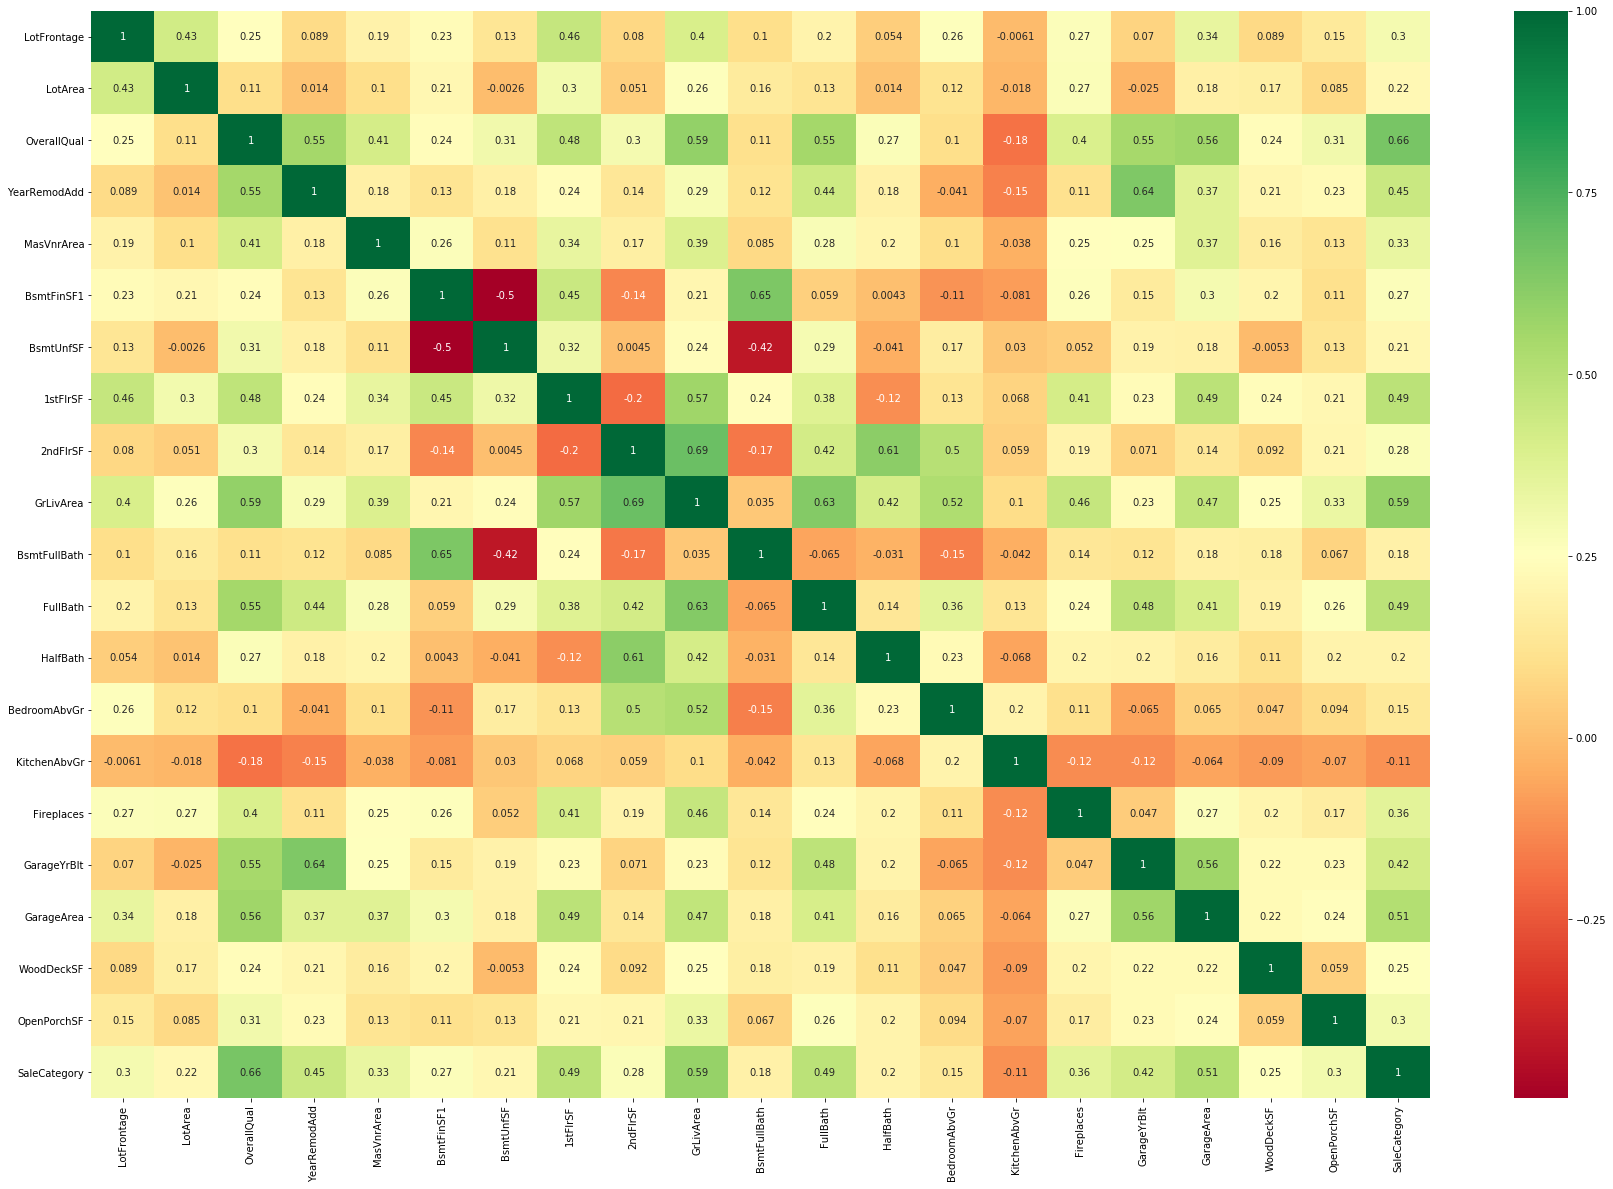

In [13]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(raw_df.corr(),annot=True,cmap="RdYlGn");

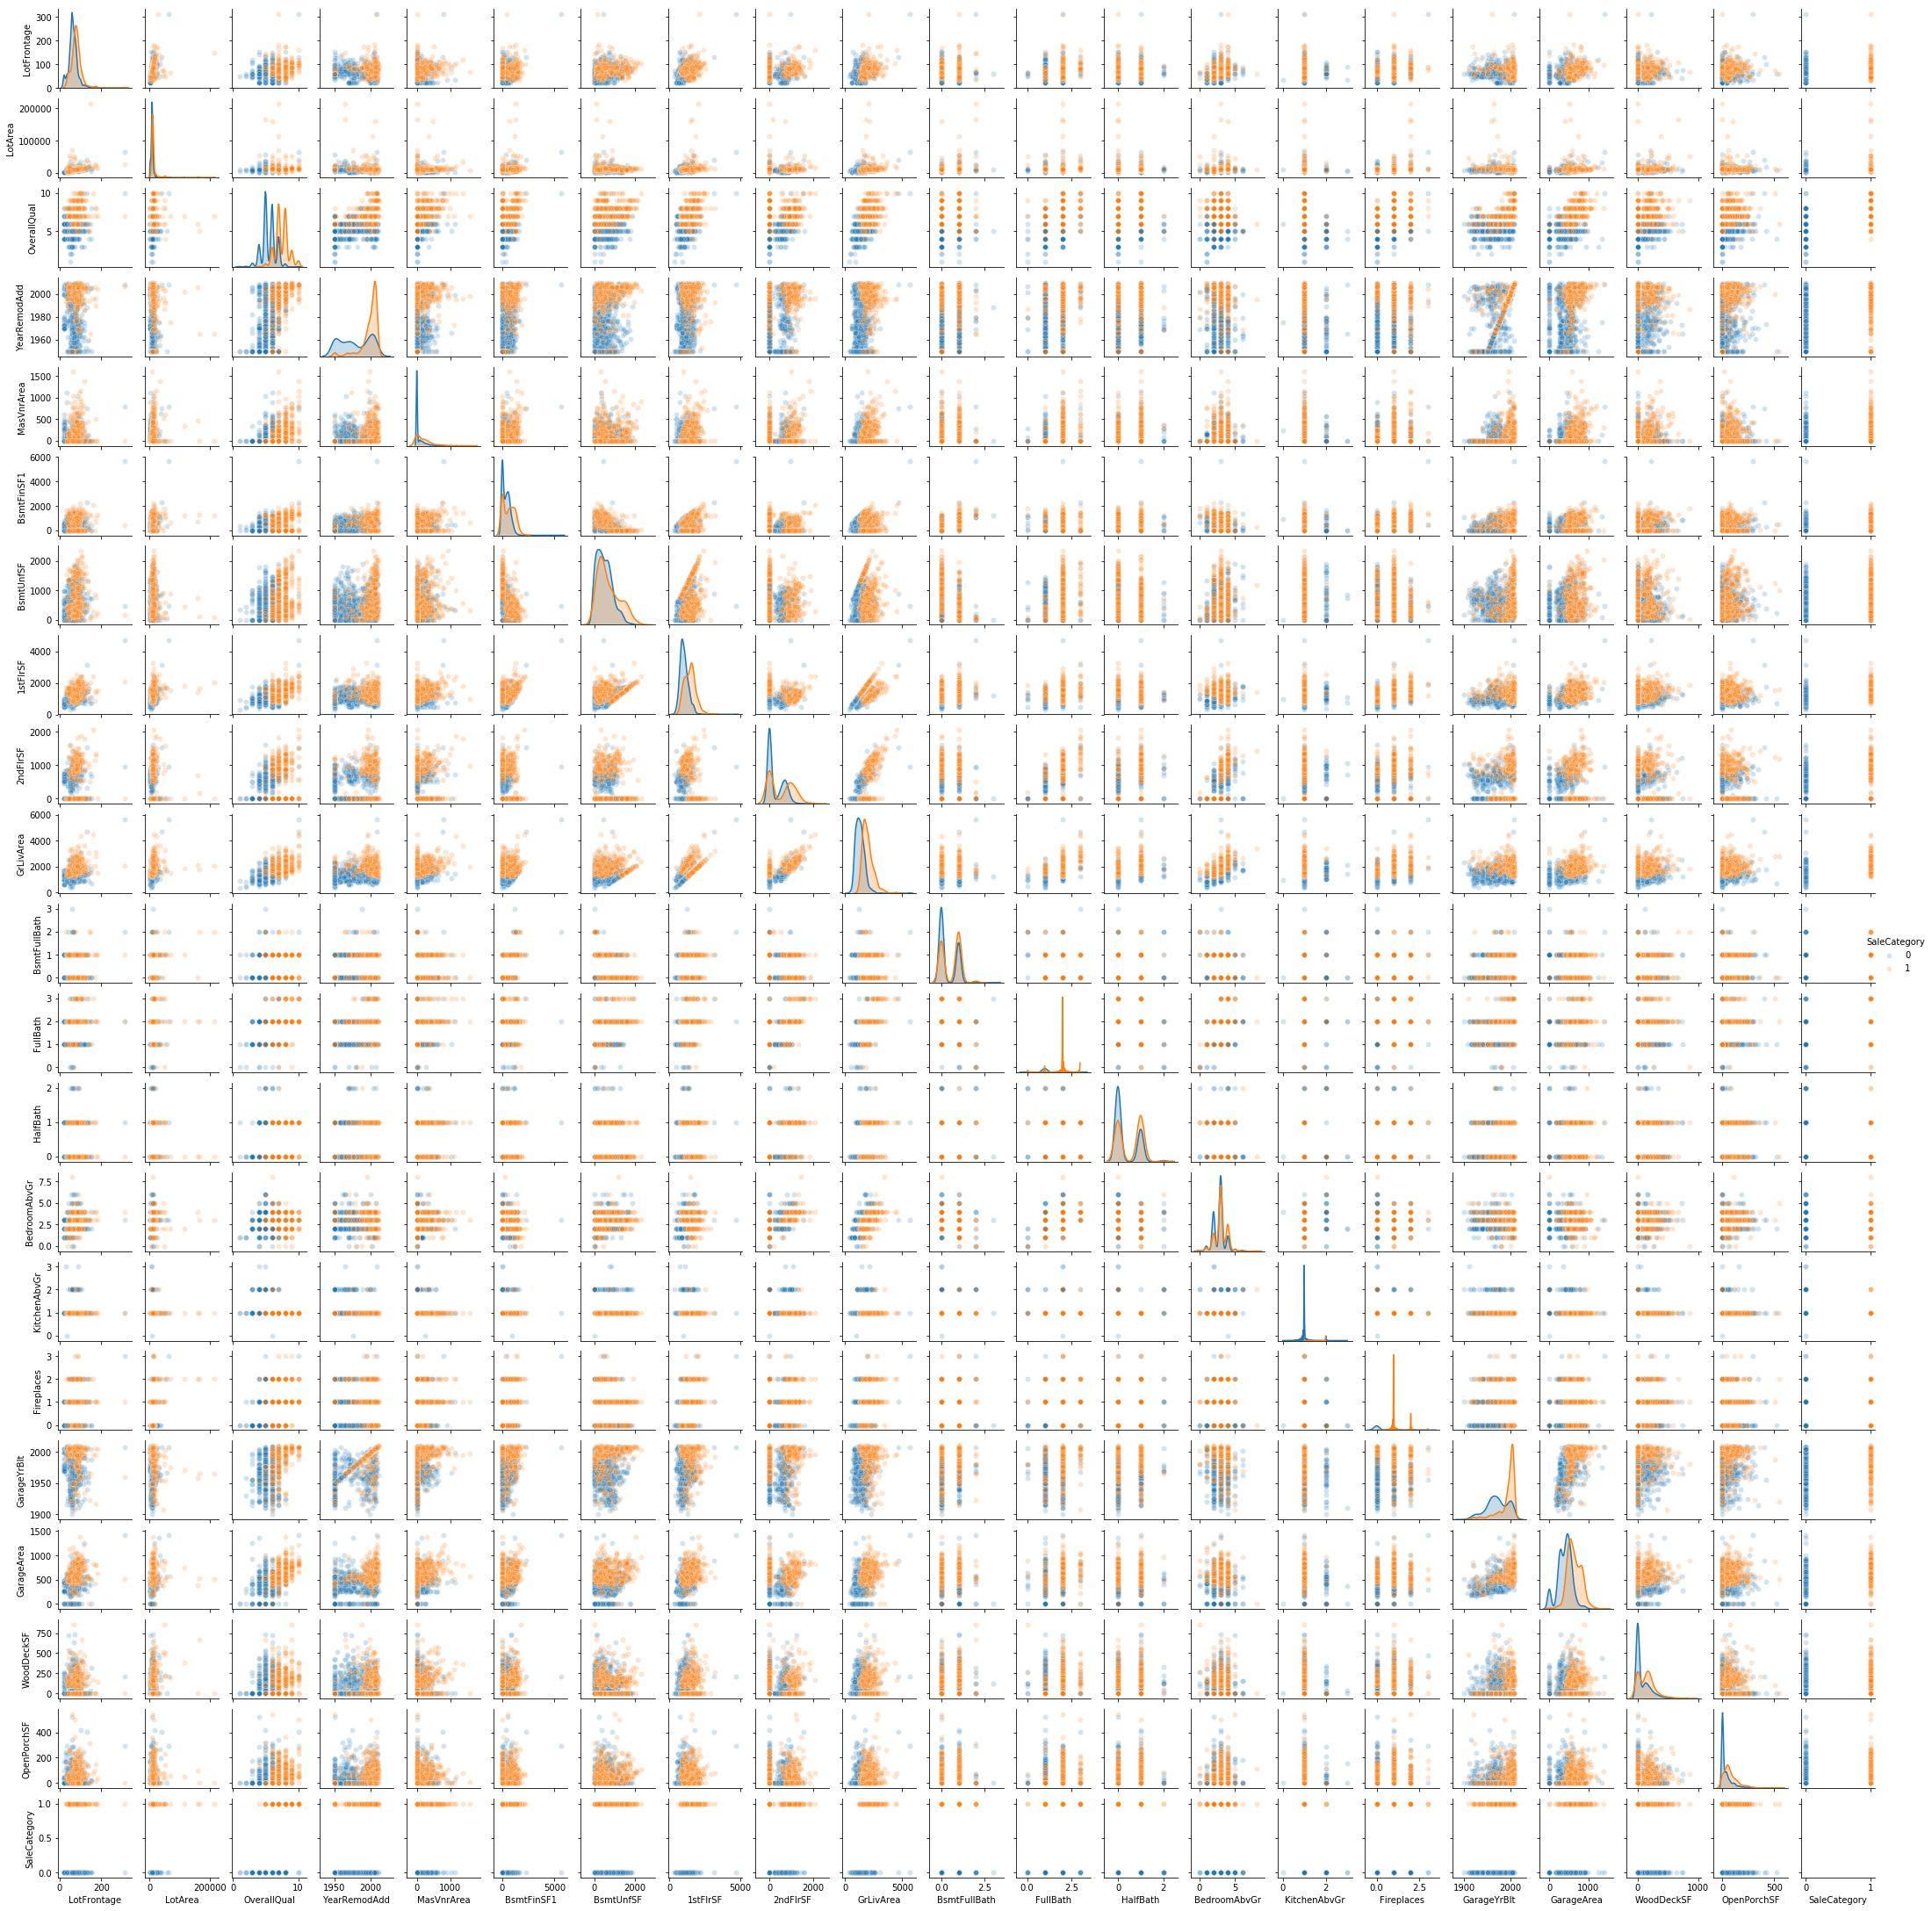

In [14]:
g=sns.pairplot(data=raw_df,plot_kws={'alpha':0.2},hue='SaleCategory');
g.fig.set_size_inches(30,30)

Что можно сделать с пропущенными значениями?

In [15]:
raw_df[list(raw_df.columns[raw_df.isnull().sum()>0])].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [16]:
raw_df[list(raw_df.columns[raw_df.isnull().sum()>0])].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


In [17]:
# чем заполнять пропущенные значения - неизвестно - удалим столбцы:
raw_df.drop(list(raw_df.columns[raw_df.isnull().sum()>0]), axis=1, inplace=True);

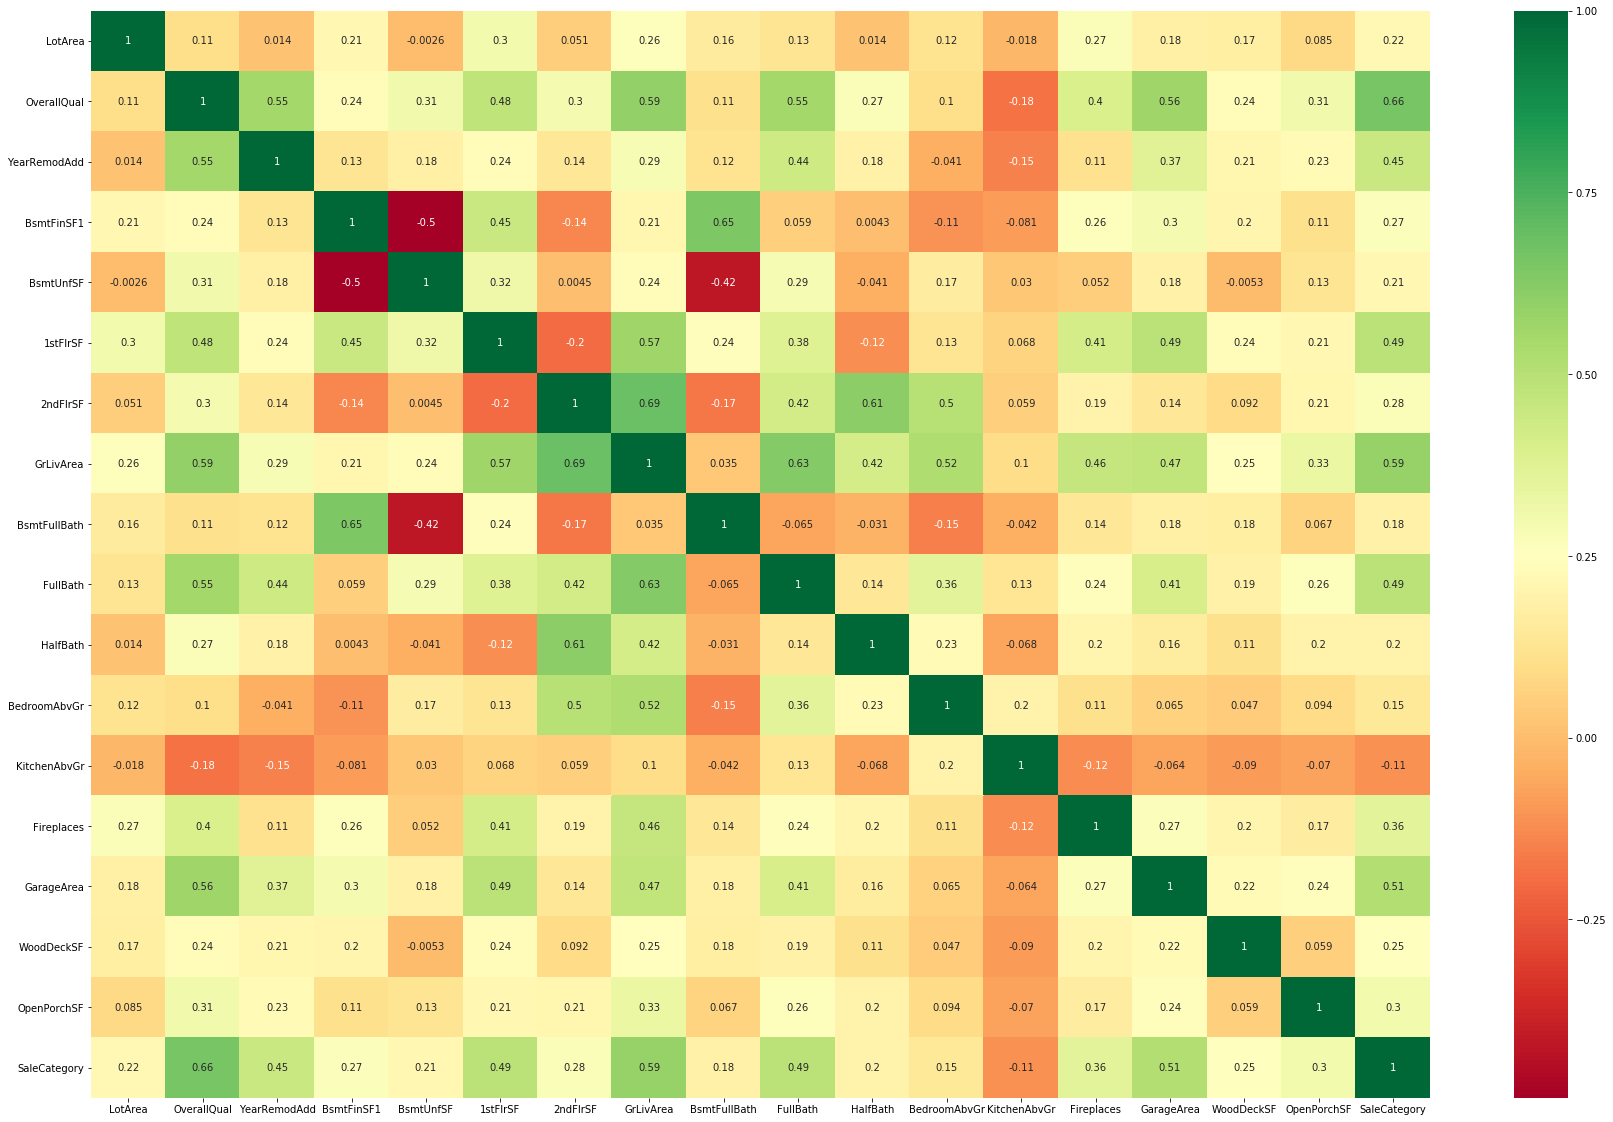

In [18]:
# что у нас осталось:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(raw_df.corr(),annot=True,cmap="RdYlGn");

Что можно сделать с категориальными переменными?

In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtFinSF1       1460 non-null int64
BsmtUnfSF        1460 n

In [20]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df.drop(each, axis=1, inplace=False), dummies], axis=1)
    return df

In [21]:
list(raw_df.loc[:, raw_df.dtypes == np.object].columns)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [22]:
df = get_one_hot(raw_df,list(raw_df.loc[:, raw_df.dtypes == np.object].columns))

In [23]:
df.head()

LotArea  OverallQual  YearRemodAdd  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0     8450            7          2003         706        150       856   
1     9600            6          1976         978        284      1262   
2    11250            7          2002         486        434       920   
3     9550            7          1970         216        540       961   
4    14260            8          2000         655        490      1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath          ...            \
0       854       1710             1         2          ...             
1         0       1262             0         2          ...             
2       866       1786             1         2          ...             
3       756       1717             1         1          ...             
4      1053       2198             1         2          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 200 columns]

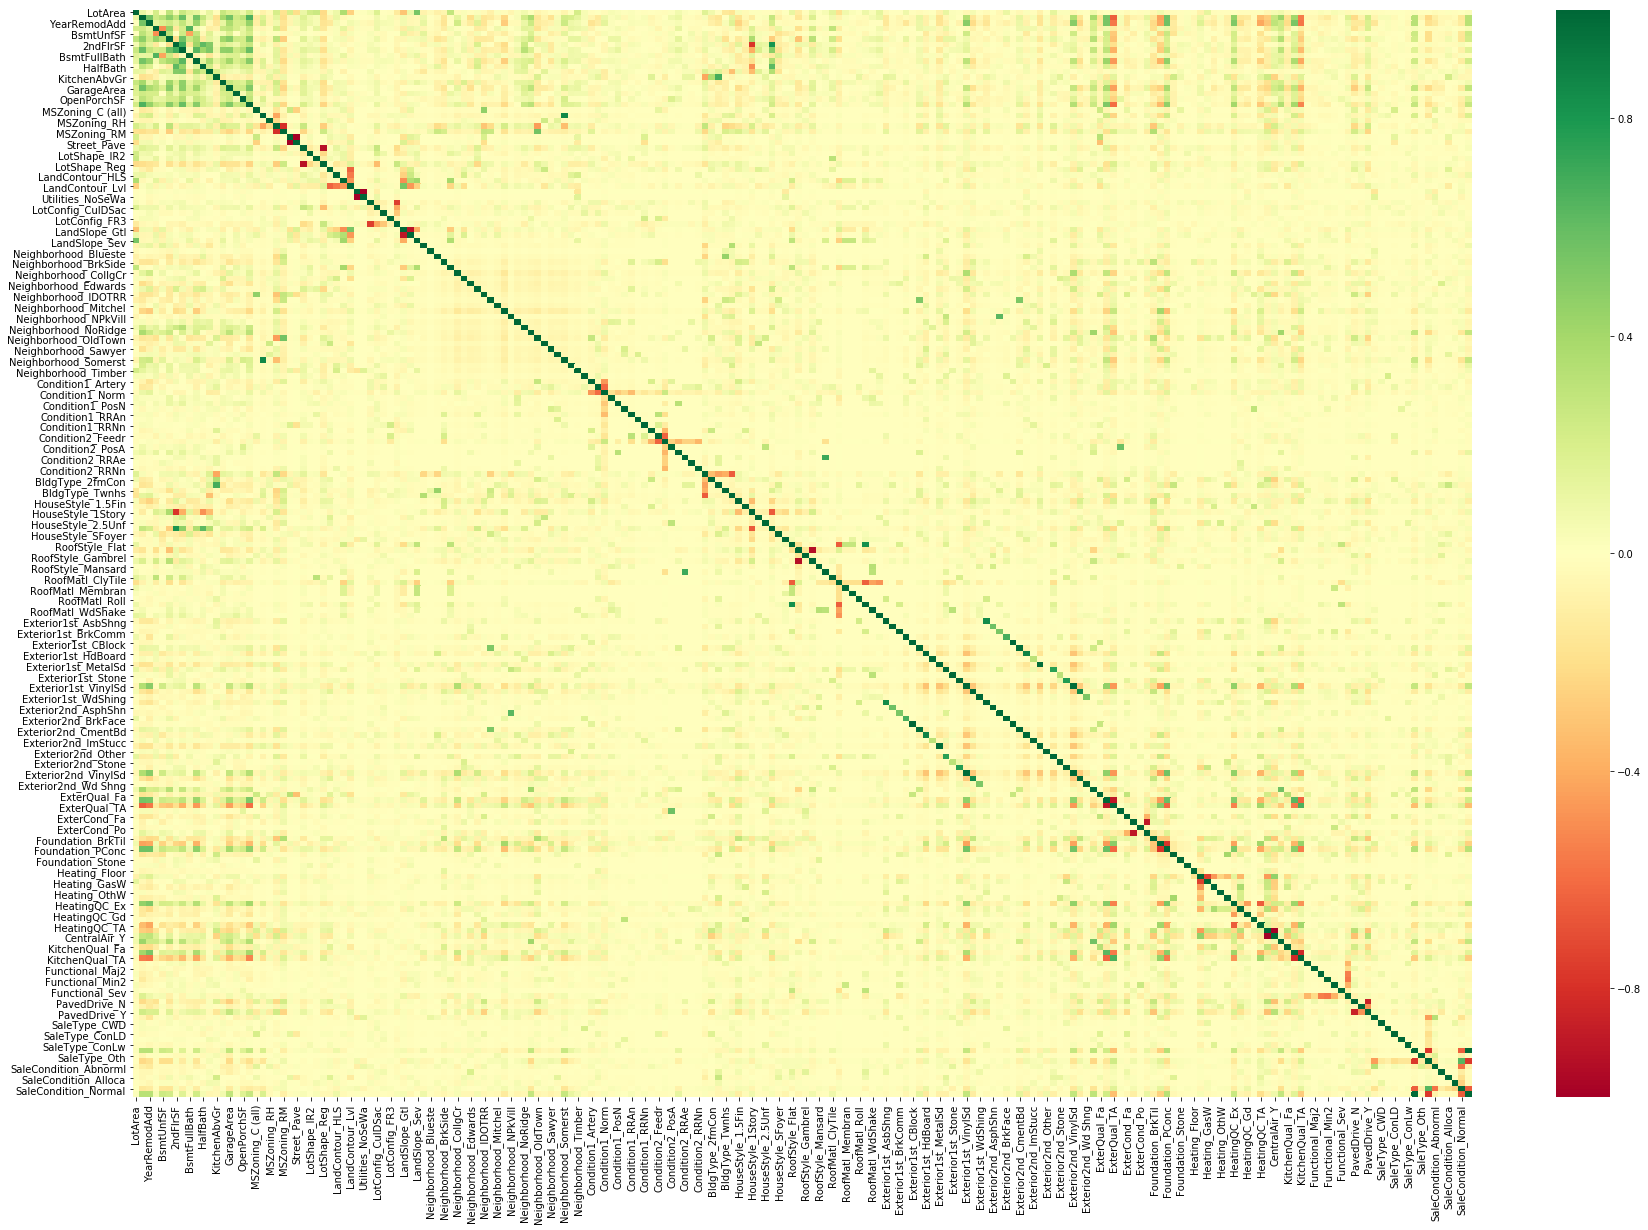

In [24]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(),annot=False,cmap="RdYlGn");

In [25]:
# Возьмем только переменные со значимой корреляцией с искомым признаком
cr = df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))>0.2) & (abs(df.corr(method ='pearson')) < 1)].dropna(how='all').dropna(axis=1, how='all')
cr

LotArea  OverallQual  YearRemodAdd  BsmtFinSF1  \
LotArea                     NaN          NaN           NaN    0.214103   
OverallQual                 NaN          NaN      0.550684    0.239666   
YearRemodAdd                NaN     0.550684           NaN         NaN   
BsmtFinSF1             0.214103     0.239666           NaN         NaN   
BsmtUnfSF                   NaN     0.308159           NaN   -0.495251   
1stFlrSF               0.299475     0.476224      0.240379    0.445863   
2ndFlrSF                    NaN     0.295493           NaN         NaN   
GrLivArea              0.263116     0.593007      0.287389    0.208171   
BsmtFullBath                NaN          NaN           NaN    0.649212   
FullBath                    NaN     0.550600      0.439046         NaN   
HalfBath                    NaN     0.273458           NaN         NaN   
BedroomAbvGr                NaN          NaN           NaN         NaN   
KitchenAbvGr                NaN          NaN           NaN         NaN   
Fireplaces             0.271364     0.396765           NaN    0.260011   
GarageArea                  NaN     0.562022      0.371600    0.296970   
WoodDeckSF                  NaN     0.238923      0.205726    0.204306   
OpenPorchSF                 NaN     0.308819      0.226298         NaN   
SaleCategory           0.223034     0.658386      0.447166    0.266621   
MSZoning_C (all)            NaN          NaN           NaN         NaN   
MSZoning_FV                 NaN          NaN      0.208816         NaN   
MSZoning_RH                 NaN          NaN           NaN         NaN   
MSZoning_RL            0.204065          NaN           NaN    0.206887   
MSZoning_RM                 NaN          NaN           NaN         NaN   
Street_Grvl                 NaN          NaN           NaN         NaN   
Street_Pave                 NaN          NaN           NaN         NaN   
LotShape_IR1                NaN          NaN           NaN         NaN   
LotShape_IR2           0.225160          NaN           NaN         NaN   
LotShape_IR3           0.256526          NaN           NaN         NaN   
LotShape_Reg          -0.216111          NaN           NaN         NaN   
LandContour_Bnk             NaN          NaN           NaN         NaN   
...                         ...          ...           ...         ...   
HeatingQC_Fa                NaN          NaN     -0.208123         NaN   
HeatingQC_Gd                NaN          NaN           NaN         NaN   
HeatingQC_Po                NaN          NaN           NaN         NaN   
HeatingQC_TA                NaN    -0.339026     -0.419614         NaN   
CentralAir_N                NaN    -0.272038     -0.298878         NaN   
CentralAir_Y                NaN     0.272038      0.298878         NaN   
KitchenQual_Ex              NaN     0.425750      0.237868    0.242038   
KitchenQual_Fa              NaN          NaN     -0.205775         NaN   
KitchenQual_Gd              NaN     0.409134      0.533628         NaN   
KitchenQual_TA              NaN    -0.553891     -0.576964         NaN   
Functional_Maj1             NaN          NaN           NaN         NaN   
Functional_Maj2             NaN          NaN           NaN         NaN   
Functional_Min1             NaN          NaN           NaN         NaN   
Functional_Min2             NaN          NaN           NaN         NaN   
Functional_Mod              NaN          NaN           NaN         NaN   
Functional_Sev              NaN          NaN           NaN         NaN   
Functional_Typ              NaN          NaN           NaN         NaN   
PavedDrive_N                NaN    -0.214103           NaN         NaN   
PavedDrive_P                NaN          NaN           NaN         NaN   
PavedDrive_Y                NaN     0.227129           NaN         NaN   
SaleType_COD                NaN          NaN           NaN         NaN   
SaleType_Con                NaN          NaN           NaN         NaN   
SaleType_ConLD              

Оставим только важные нам признаки согласно корреляции искомому признаку

In [26]:
df=df[list(cr['SaleCategory'].reset_index().dropna(axis=0)['index'])+['SaleCategory']]

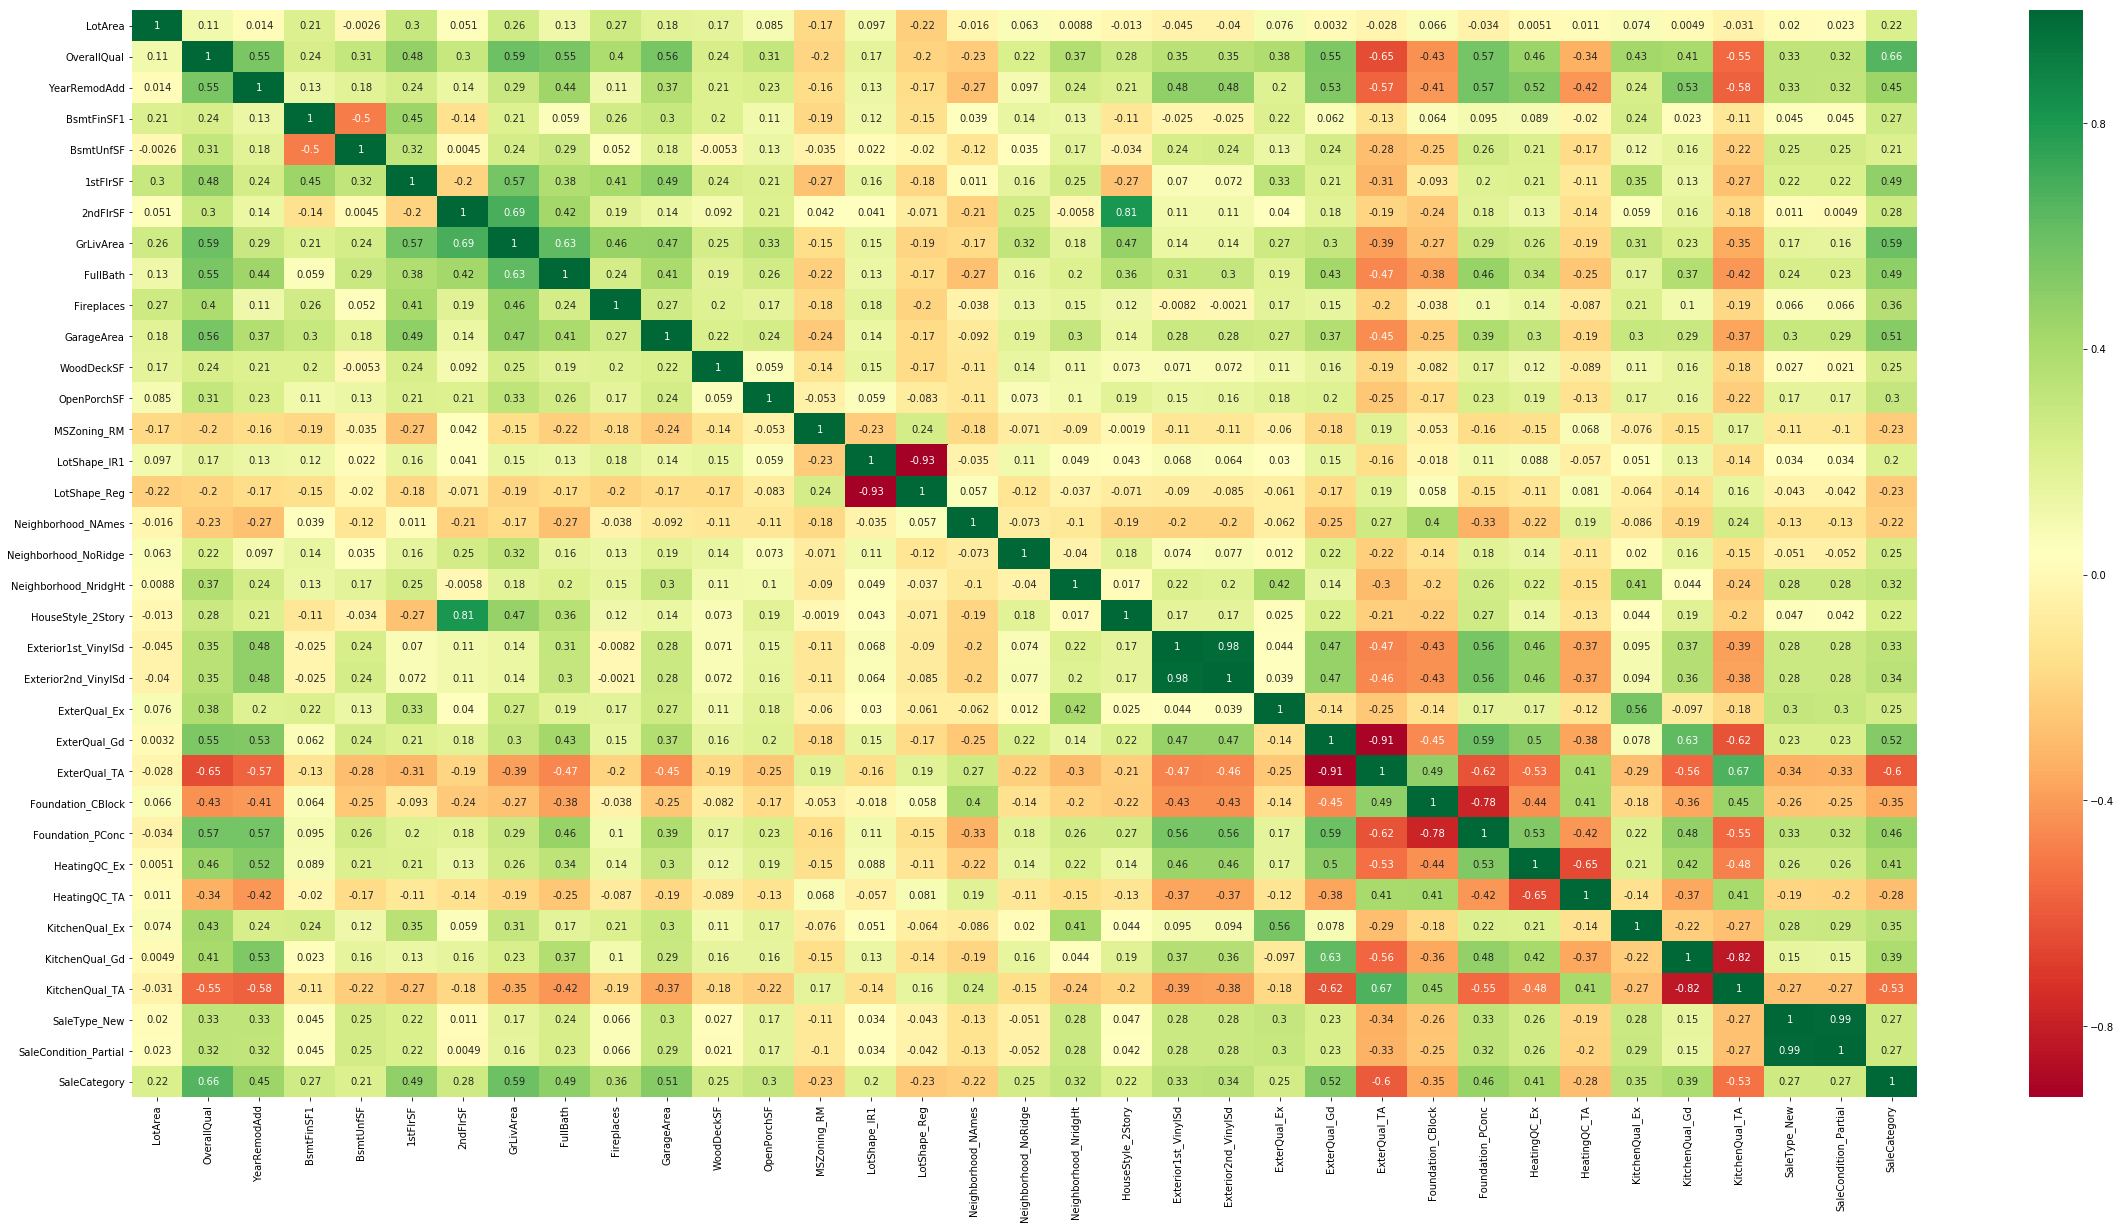

In [27]:
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn");

Таким образом, решили задачу: Попробовать отобрать наиболее важные переменные (наибольшая корреляция или метод на ваш выбор)

### Далее по списку:

* Решить задачу бинарной классификации и предсказать переменную ‘SalesCategory’ протестировав нескольких алгоритмов (Logistic Regression, Random Forest)
* Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
* Сравнить результаты классификации при использовании изначального датасета и датасета с уменьшенной размерностью

In [28]:
X, y = df.drop(['SaleCategory'], axis=1,inplace=False), df['SaleCategory'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [29]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((1095, 34), (365, 34), 1095, 365)

### Линейная регрессия:

In [30]:
lm = LogisticRegression().fit(X_train,y_train)
y_train_predict = lm.predict(X_train)
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)
y_test_predict = lm.predict(X_test)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)

Train:  0.91
Test:  0.92


In [31]:
print(f'accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'recall: {recall_score(y_test, y_test_predict, average="macro")}')

accuracy: 0.9342465753424658
f1: 0.921098140942499
precision: 0.9234043323915091
recall: 0.9188825974770642


### Случайный лес:

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE).fit(X_train, y_train)
y_train_predict = clf.predict_proba(X_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  1.0


In [33]:
y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)

Test:  0.98


In [34]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

In [35]:
print(f'accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'recall: {recall_score(y_test, y_test_predict, average="macro")}')

accuracy: 0.9397260273972603
f1: 0.925609575335359
precision: 0.9425103862132636
recall: 0.9122527236238532


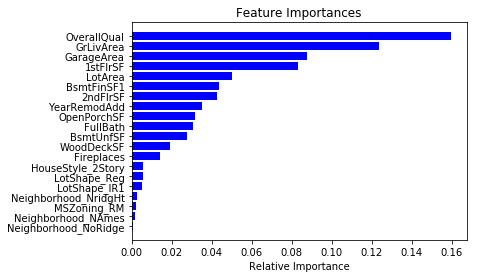

In [36]:
features = X_train.columns
importances = clf.feature_importances_[0:20]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Случайный лес явно лидирует в данном зачете!

## Посмотрим, что мы можем улучшить с помощью понижения размерности:

In [37]:
print(f'Текущая размерность датасета: {X_train.shape}')

Текущая размерность датасета: (1095, 34)


In [38]:
# Возьмем для начала сжатие до 10 компонент
n=10
pca = PCA(n_components=n)
pc = pca.fit_transform(df.drop(['SaleCategory'], axis=1,inplace=False))
df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
df_with_pc = pd.concat([df_pc, df[['SaleCategory']]], axis = 1)

Теперь натравим на этот датасет случайный лес (как наилучший алгоритм на тесте):

In [39]:
X, y = df_with_pc.drop(['SaleCategory'], axis=1,inplace=False), df_with_pc['SaleCategory'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [40]:
clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE).fit(X_train, y_train)
y_train_predict = clf.predict_proba(X_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)
y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'recall: {recall_score(y_test, y_test_predict, average="macro")}')

Train:  1.0
Test:  0.96
accuracy: 0.915068493150685
f1: 0.8954840616657892
precision: 0.9096537491401055
recall: 0.8841384747706422


Лучше не стало. Может 10 компонент - не самое оптимальное количество? Посмотрим на все возможные комбинации и результаты на тесте:

In [41]:
l_result = []
for n in range(1,df.shape[1]-1):
    pca = PCA(n_components=n, random_state=C_RANDOM_STATE)
    pc = pca.fit_transform(df.drop(['SaleCategory'], axis=1,inplace=False))
    df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
    df_with_pc = pd.concat([df_pc, df[['SaleCategory']]], axis = 1)
    
    X, y = df_with_pc.drop(['SaleCategory'], axis=1,inplace=False), df_with_pc['SaleCategory'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE, n_jobs=-1).fit(X_train, y_train)
    y_test_predict_proba = clf.predict_proba(X_test)[:, 1]
    y_test_predict = clf.predict(X_test)
    l_result.append((n,np.round(roc_auc_score(y_test, y_test_predict_proba), 2),accuracy_score(y_test, y_test_predict),f1_score(y_test, y_test_predict, average="macro")))

In [42]:
# отсортируем по наивысшему ROC_AUC на тесте и F-мере
l_result.sort(key=lambda x:x[1]*10+x[3],reverse=True)
l_result

[(29, 0.98, 0.9397260273972603, 0.925609575335359),
 (28, 0.98, 0.9342465753424658, 0.9202302032490711),
 (14, 0.98, 0.9315068493150684, 0.9166735154188241),
 (17, 0.98, 0.9205479452054794, 0.9004504885779046),
 (27, 0.98, 0.9123287671232877, 0.8936402709987616),
 (24, 0.97, 0.9205479452054794, 0.8998287104070257),
 (21, 0.97, 0.915068493150685, 0.8954840616657892),
 (12, 0.97, 0.915068493150685, 0.894233555491162),
 (11, 0.97, 0.9095890410958904, 0.8887410979022916),
 (19, 0.97, 0.9095890410958904, 0.8874099139099466),
 (13, 0.97, 0.9041095890410958, 0.8852417782808275),
 (18, 0.97, 0.9068493150684932, 0.8843472750316856),
 (32, 0.97, 0.9041095890410958, 0.8833429215863536),
 (16, 0.97, 0.9041095890410958, 0.8826786911441927),
 (15, 0.97, 0.9013698630136986, 0.8789787798408488),
 (20, 0.97, 0.8958904109589041, 0.8648148148148149),
 (10, 0.96, 0.9260273972602739, 0.9094949903112344),
 (26, 0.96, 0.9068493150684932, 0.8863553113553113),
 (30, 0.96, 0.9068493150684932, 0.8843472750316856

In [43]:
print(f'Лучшее количество компонент: {l_result[0][0]}')

Лучшее количество компонент: 29


In [44]:
n=l_result[0][0]
pca = PCA(n_components=n, random_state=C_RANDOM_STATE)
pc = pca.fit_transform(df.drop(['SaleCategory'], axis=1,inplace=False))
df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
df_with_pc = pd.concat([df_pc, df[['SaleCategory']]], axis = 1)

X, y = df_with_pc.drop(['SaleCategory'], axis=1,inplace=False), df_with_pc['SaleCategory'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [45]:
print(f'Найдем наилучшие гиперпараметры для случайного леса для тренировочного набора для полученного датасета из {n} компонент(ы):')

Найдем наилучшие гиперпараметры для случайного леса для тренировочного набора для полученного датасета из 29 компонент(ы):


In [46]:
parameters = {
    'n_estimators'      : [50,100,200,300,500],
    'max_depth'         : [10, 15, 20, 25, 30],
    'min_samples_split' : [2,10,100]
}

gscv = GridSearchCV(RandomForestClassifier(random_state=C_RANDOM_STATE), parameters, cv=10, n_jobs=-1)
gscv.fit(X_train, y_train)

print(gscv.score(X_test, y_test))
print(gscv.best_params_)

0.9342465753424658
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 500}


Test ROC_AUC:  0.97
Test accuracy: 0.9342465753424658
Test f1: 0.9188468094567555
Test precision: 0.9354900753962148
Test recall: 0.9057124426605505


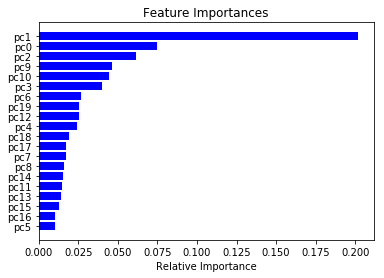

In [47]:
cv_best_params = gscv.best_params_
clf = RandomForestClassifier(n_estimators=cv_best_params['n_estimators'],max_depth=cv_best_params['max_depth'],min_samples_split=cv_best_params['min_samples_split'],
                             random_state=C_RANDOM_STATE, n_jobs=-1).fit(X_train, y_train)
# clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE, n_jobs=-1).fit(X_train, y_train)
y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test ROC_AUC: ", roc_auc_test)
y_test_predict = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'Test f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'Test precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'Test recall: {recall_score(y_test, y_test_predict, average="macro")}')

features = X_train.columns
importances = clf.feature_importances_[0:20]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Вывод: Подобранные гиперпараметры на TRAIN не улучшают качество модели на тесте. Но снижение размерности улучшило качество!